In [26]:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [27]:
# plot settings
mpl.style.use("ggplot")
mpl.rcParams["figure.figsize"] = (20, 5)
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "lightgray"
mpl.rcParams["axes.linewidth"] = 1
mpl.rcParams["xtick.color"] = "black"
mpl.rcParams["ytick.color"] = "black"
mpl.rcParams["font.size"] = 12
mpl.rcParams["figure.titlesize"] = 25
mpl.rcParams["figure.dpi"] = 100

In [3]:
split_data = pd.read_pickle("../experiments/split_data.pkl")

split_data.head()

,host_identity_verified,neighbourhood_group,instant_bookable,cancellation_policy,room_type,construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,price,service_fee
0,0,1,0,2,2,2020.0,10.0,9.0,0.21,4.0,6.0,286.0,966.0,193.0
1,1,2,0,1,0,2007.0,30.0,45.0,0.38,4.0,2.0,228.0,142.0,28.0
4,1,2,0,1,0,2009.0,10.0,9.0,0.10,3.0,1.0,289.0,204.0,41.0
5,1,2,1,0,0,2013.0,3.0,74.0,0.59,3.0,1.0,365.0,577.0,115.0
7,0,1,0,1,2,2009.0,45.0,49.0,0.40,5.0,1.0,219.0,1060.0,212.0


In [4]:
split_data.shape

(100594, 14)

In [5]:
split_data.columns

Index(['host_identity_verified', 'neighbourhood_group', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'price', 'service_fee'],
      dtype='object')

In [6]:
# X and y
X = split_data.drop(["price"], axis=1).values
y = split_data['price'].values

X.shape, y.shape

((100594, 13), (100594,))

In [7]:
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

splits_shapes = {
    "Training Features": X_train.shape,
    "Training Labels": y_train.shape,
    "Testing Features": X_test.shape,
    "Testing Labels": y_test.shape,
}
splits_shapes

{'Training Features': (75445, 13),
 'Training Labels': (75445,),
 'Testing Features': (25149, 13),
 'Testing Labels': (25149,)}

In [8]:
# Scale data with RobustScaler
from sklearn.preprocessing import RobustScaler

ro_scaler = RobustScaler()
X_train = ro_scaler.fit_transform(X_train)
X_test = ro_scaler.fit_transform(X_test)

In [9]:
import matplotlib.pyplot as plt

def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
    plt.figure(figsize=(15, 8))
    plt.plot(df[:20])
    plt.legend(['Actual', 'Predicted'])

## **Linear Regression**

In [10]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
print("Score:", reg.score(X_test, y_test))
print("Intercept:", reg.intercept_)
print("Co-eff:", reg.coef_)

Score: 0.9877797759896411
Intercept: 626.3275298658183
Co-eff: [-1.13908260e-01  1.28890274e-01  1.01816211e-01 -2.12418978e-02
  2.61975183e-01  8.16021809e-02  6.63039156e-02  2.46250346e-02
 -1.99101519e-01 -1.01558997e-02  2.66639863e-04 -9.86215861e-02
  5.70146773e+02]


In [12]:
pd.DataFrame(reg.coef_, split_data.columns[:-1], columns=['Coeficient'])

,Coeficient
host_identity_verified,-0.113908
neighbourhood_group,0.128890
instant_bookable,0.101816
cancellation_policy,-0.021242
room_type,0.261975
construction_year,0.081602
minimum_nights,0.066304
number_of_reviews,0.024625
reviews_per_month,-0.199102
review_rate_number,-0.010156


In [13]:
# Make predictions
y_pred = reg.predict(X_test)

pred_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
pred_df.head(10)

,y_test,y_pred
0,845.0,849.346198
1,1026.0,1028.244220
2,1081.0,1082.524671
3,870.0,874.015647
4,130.0,139.774688
5,521.0,526.790488
6,1190.0,1191.393146
7,56.0,65.709469
8,646.0,651.356443
9,1016.0,1018.142303


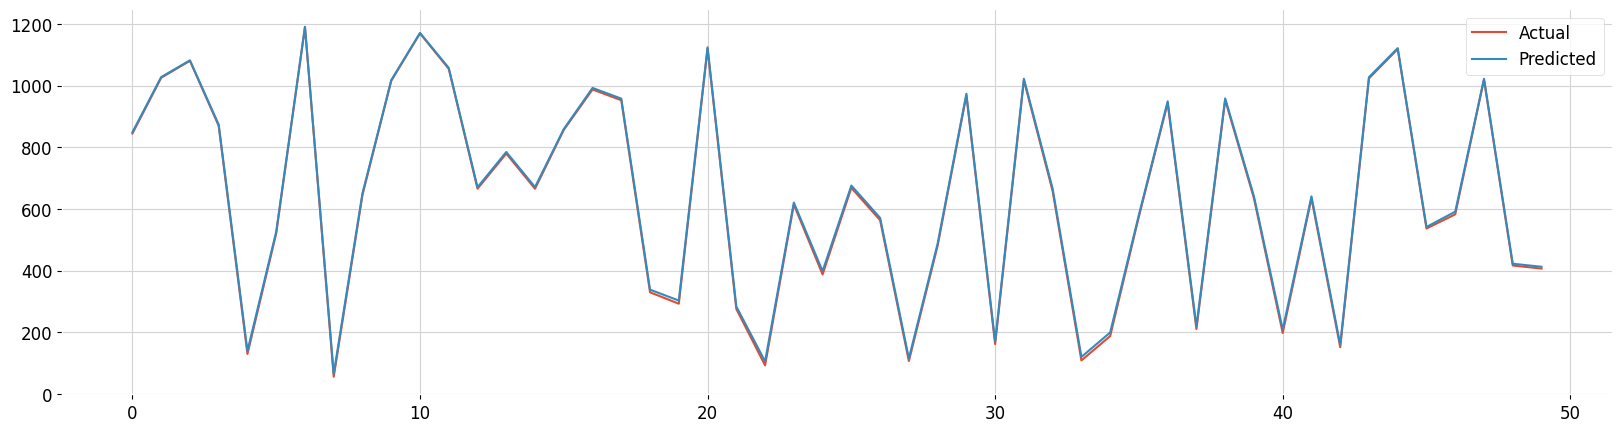

In [14]:
plt.plot(pred_df[:50])
plt.legend(['Actual', 'Predicted'])

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    # Train
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Evaluation
    mse_score = mean_squared_error(y_test, y_pred)
    r_score = r2_score(y_test, y_pred)

    return y_pred, mse_score, r_score

In [16]:
# Evaluation
_, reg_mse, reg_r2 = evaluate_model(linear_model.LinearRegression())
reg_mse, reg_r2

(1343.7712359329128, 0.9877797759896411)

In [17]:
# Models
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lin_reg = LinearRegression()
dt = DecisionTreeRegressor() 
rf = RandomForestRegressor()
ridge = Ridge(alpha=0.4)
elastic = ElasticNet()


lin_reg_preds, lin_reg_mse, lin_reg_r2 = evaluate_model(lin_reg)
dt_preds, dt_mse, dt_r2 = evaluate_model(dt)
rf_preds, rf_mse, rf_r2 = evaluate_model(rf)
ridge_preds, ridge_mse, ridge_r2 = evaluate_model(lin_reg)
elastic_preds, elastic_mse, elastic_r2 = evaluate_model(elastic)


# Creating a DataFrame
data = {
    'mse': [lin_reg_mse, dt_mse, rf_mse, ridge_mse, elastic_mse],
    'r2': [lin_reg_r2, dt_r2, rf_r2, ridge_r2, elastic_r2],
    'model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Ridge Regression', 'ElasticNet']
}

results_df = pd.DataFrame(data)
results_df

,mse,r2,model
0,1343.771236,0.987780,Linear Regression
1,589.535488,0.994639,Decision Tree
2,322.862551,0.997064,Random Forest
3,1343.771236,0.987780,Ridge Regression
4,40428.660008,0.632343,ElasticNet


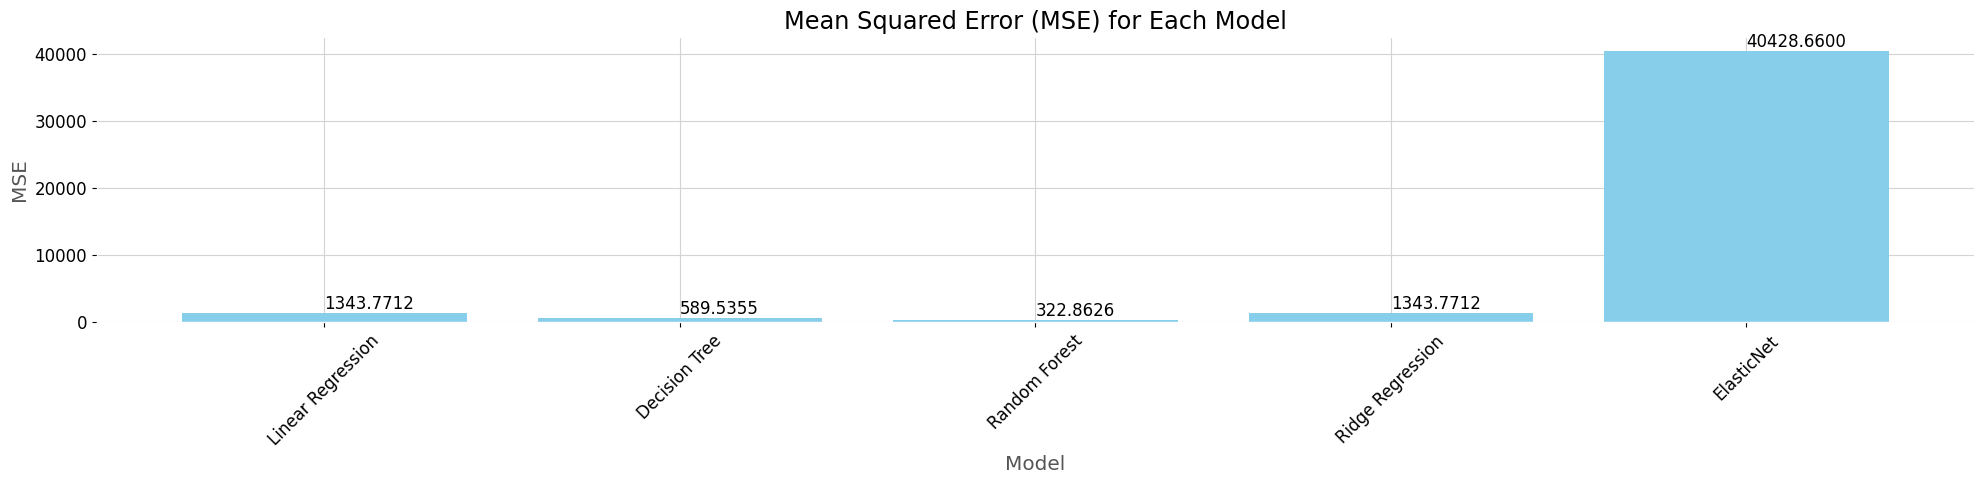

In [18]:
# Plotting MSE with annotations
bars = plt.bar(results_df['model'], results_df['mse'], color='skyblue')
plt.title('Mean Squared Error (MSE) for Each Model')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval, f'{yval:.4f}', va='bottom')

plt.tight_layout()
plt.savefig("../visualizations/16_MSE_comparison.png", bbox_inches='tight')

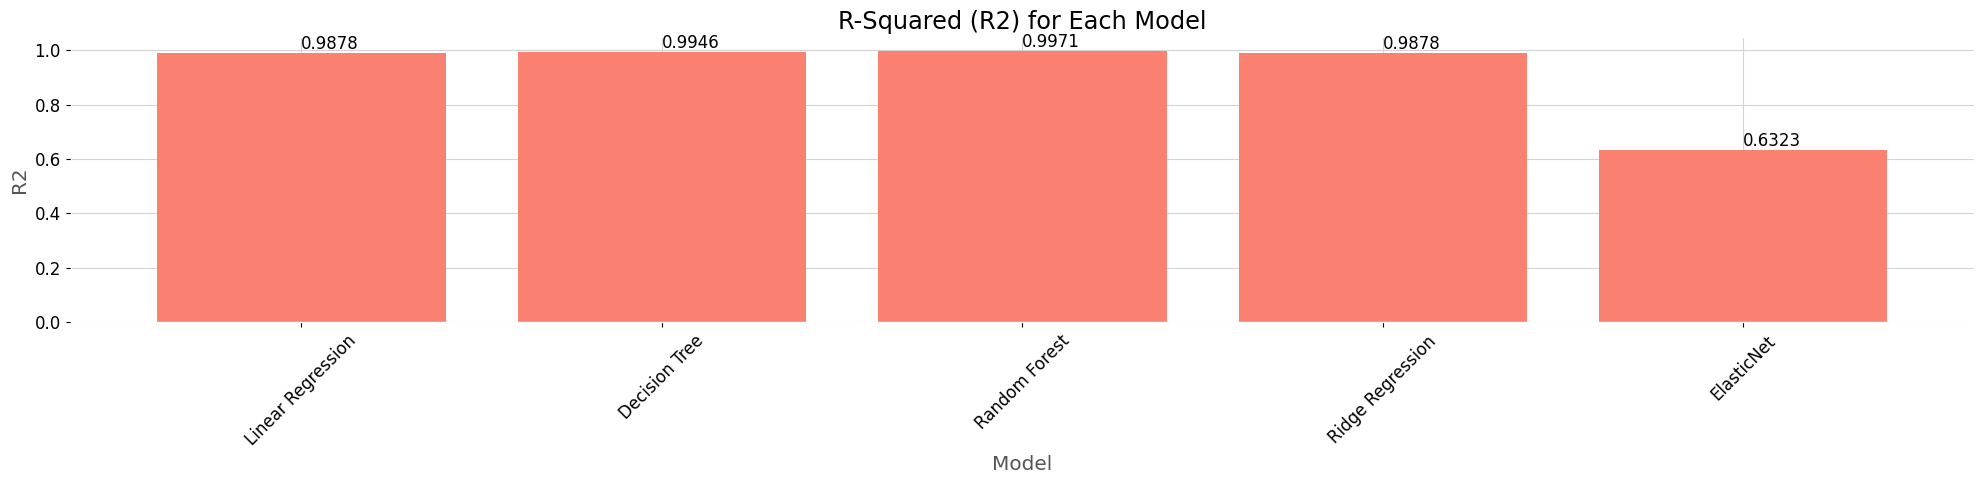

In [19]:
# Plotting R2
bars = plt.bar(results_df['model'], results_df['r2'], color='salmon')
plt.title('R-Squared (R2) for Each Model')
plt.xlabel('Model')
plt.ylabel('R2')
plt.xticks(rotation=45)

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval, f'{yval:.4f}', va='bottom')

plt.tight_layout()
plt.savefig("../visualizations/17_R2_comparison.png", bbox_inches='tight')

**Linear Regression** seems to have good mse and r2 score, because other models except Ridge are overfitting.

In [20]:
import pickle

# Serialize and save the DataFrame to a file using pickle.dump
with open("lin_reg_model.pkl", "wb") as f:
    pickle.dump(lin_reg, f)

In [21]:
# Predict using saved model
with open("../experiments/lin_reg_model.pkl", 'rb') as f:
    model = pickle.load(f)

model

LinearRegression()

In [22]:
split_data

,host_identity_verified,neighbourhood_group,instant_bookable,cancellation_policy,room_type,construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,price,service_fee
0,0,1,0,2,2,2020.0,10.0,9.0,0.210000,4.0,6.0,286.0,966.0,193.0
1,1,2,0,1,0,2007.0,30.0,45.0,0.380000,4.0,2.0,228.0,142.0,28.0
4,1,2,0,1,0,2009.0,10.0,9.0,0.100000,3.0,1.0,289.0,204.0,41.0
5,1,2,1,0,0,2013.0,3.0,74.0,0.590000,3.0,1.0,365.0,577.0,115.0
7,0,1,0,1,2,2009.0,45.0,49.0,0.400000,5.0,1.0,219.0,1060.0,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102037,0,0,1,2,2,2008.0,1.0,0.0,1.378291,3.0,1.0,0.0,531.0,0.0
102038,0,1,1,0,2,2016.0,28.0,17.0,0.610000,1.0,6.0,229.0,570.0,0.0
102039,1,2,1,1,0,2003.0,2.0,49.0,1.810000,1.0,3.0,147.0,665.0,0.0
102040,1,3,1,2,2,2022.0,1.0,239.0,8.580000,2.0,2.0,361.0,982.0,196.0
